In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
traindata = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             horizontal_flip=True,
                              rotation_range=260,
                                vertical_flip=True,
                               fill_mode='reflect',
                               validation_split=0.2)

In [ ]:
testdata = ImageDataGenerator (rescale=1./255)

In [ ]:
x_train = traindata.flow_from_directory('/content/Dataset/Dataset/train_set',
                                        target_size = (64,64),
                                        class_mode ='categorical',
                                        batch_size = 100,
                                         shuffle=True)

Found 436 images belonging to 2 classes.


In [ ]:
x_test = testdata.flow_from_directory("/content/Dataset/Dataset/test_set",
                                      target_size=(64,64),
                                      class_mode = 'categorical',
                                      batch_size = 100,
                                      shuffle=True)

Found 121 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,Dense,MaxPooling2D,Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(450,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [ ]:
#compile
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
#train
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=100,
                    validation_data=x_test, 
                    validation_steps=len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/100
5/5 [==============================] - 24s 3s/step - loss: 0.7869 - accuracy: 0.5940 - val_loss: 0.6799 - val_accuracy: 0.5041
Epoch 2/100
5/5 [==============================] - 14s 3s/step - loss: 0.5546 - accuracy: 0.7133 - val_loss: 0.3477 - val_accuracy: 0.8843
Epoch 3/100
5/5 [==============================] - 15s 3s/step - loss: 0.4339 - accuracy: 0.7982 - val_loss: 0.1754 - val_accuracy: 0.9339
Epoch 4/100
5/5 [==============================] - 15s 3s/step - loss: 0.3026 - accuracy: 0.8761 - val_loss: 0.1413 - val_accuracy: 0.9339
Epoch 5/100
5/5 [==============================] - 14s 3s/step - loss: 0.2416 - accuracy: 0.8876 - val_loss: 0.1064 - val_accuracy: 0.9669
Epoch 6/100
5/5 [==============================] - 14s 3s/step - loss: 0.2136 - accuracy: 0.9106 - val_loss: 0.1076 - val_accuracy: 0.9504
Epoch 7/100
5/5 [==============================] - 14s 3s/step - loss: 0.1912 - accuracy: 0.9128 - val_loss: 0.0931 - val_accuracy: 0.9669
Epoch 8/100
5/5 [==========

In [ ]:
#save the model
model.save('FFD.h5')

In [ ]:
from keras.models import load_model

model1 = load_model('//content/drive/MyDrive/ibm/FFD.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
img = image.load_img("/content/Large_bonfire.jpg",target_size=(64,64))

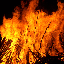

In [ ]:
img

In [ ]:
x = image.img_to_array(img)

In [ ]:
x = np.expand_dims(x,axis=0)
x

array([[[[  2.,   0.,   1.],
         [  2.,   0.,   1.],
         [  2.,   0.,   1.],
         ...,
         [  3.,   0.,   0.],
         [  5.,   1.,   0.],
         [  2.,   0.,   1.]],

        [[  2.,   0.,   1.],
         [  2.,   0.,   1.],
         [  2.,   0.,   1.],
         ...,
         [ 12.,   4.,   2.],
         [  6.,   2.,   1.],
         [  4.,   0.,   0.]],

        [[  2.,   0.,   1.],
         [  2.,   0.,   1.],
         [  2.,   0.,   1.],
         ...,
         [ 16.,   2.,   1.],
         [ 10.,   0.,   0.],
         [ 35.,   2.,   0.]],

        ...,

        [[ 66.,   2.,   0.],
         [ 63.,   8.,   3.],
         [142.,  34.,   0.],
         ...,
         [  1.,   0.,   0.],
         [  4.,   2.,   3.],
         [  7.,   3.,   2.]],

        [[ 57.,   5.,   7.],
         [103.,  28.,   0.],
         [244., 201.,   1.],
         ...,
         [  2.,   0.,   1.],
         [  2.,   0.,   1.],
         [  2.,   0.,   1.]],

        [[243., 109.,  14.],
       

In [ ]:
model1.predict(x)

1/1 [==============================] - 0s 18ms/step


array([[0., 1.]], dtype=float32)

In [ ]:
x_train.class_indices

{'forest': 0, 'with fire': 1}

In [ ]:
op = ['No fire','fire']
pred = np.argmax(model1.predict(x))
op[pred]

1/1 [==============================] - 0s 18ms/step


'fire'